Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


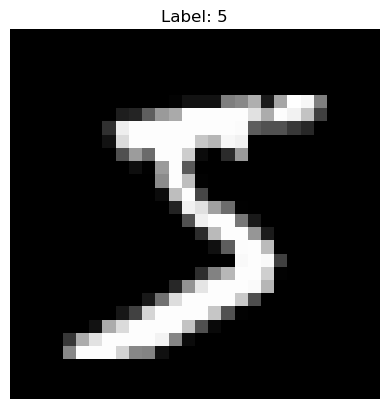

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=10, edgeitems=10)
# Load the dataset
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# Normalize the data to the range [0, 1]
X_train_raw = X_train_raw.astype('float32') / 255
X_test_raw = X_test_raw.astype('float32') / 255

print(f"Training data shape: {X_train_raw.shape}")
print(f"Test data shape: {X_test_raw.shape}")

# Plot one image from the training dataset
plt.imshow(X_train_raw[0], cmap='gray')
plt.title(f"Label: {y_train_raw[0]}")
plt.axis('off')
plt.show()

In [2]:
X_train = X_train_raw.reshape(X_train_raw.shape[0],-1).T
X_test = X_test_raw.reshape(X_test_raw.shape[0],-1).T

In [3]:
def softmax(array):
    # Subtract the max value to prevent overflow during exponentiation
    exp_array = np.exp(array - np.max(array, axis=-1, keepdims=True))
    return exp_array / np.sum(exp_array, axis=-1, keepdims=True)

def clipping(y_pred, epsilon=1e-15):
    return np.clip(y_pred, epsilon, 1 - epsilon)

class AnnStructure:
    def __init__(self,data,hidden_sizes,output_size):
        
        self.data = data
        #data must be stored such that len(data) == input_size
        self.input_size = self.data.shape[0]
        #array of size for each hidden layer
        self.hidden_sizes = hidden_sizes
        #size of the output layer
        self.output_size = output_size
        
        #definition of the weights and biases
        self.W = []
        self.b = []

        # Weights and biases for input to first hidden layer
        self.W.append(np.random.rand(hidden_sizes[0],self.input_size))
        self.b.append(np.zeros((hidden_sizes[0],1)))

        # Weights and biases for connections between hidden layers
        for i in range(1, len(hidden_sizes)):
            self.W.append(np.random.rand(hidden_sizes[i],hidden_sizes[i-1]))
            self.b.append(np.zeros((hidden_sizes[i],1)))

        # Weights and biases for last hidden layer to output layer
        self.W.append(np.random.rand(output_size,hidden_sizes[-1]))
        self.b.append(np.zeros((output_size,1)))
        
        #definition of the output of each layer
        self.Z = []
        
    def feedforward(self):
        
        print(f"W[0] = {self.W[0]} \n\n data = {self.data} \n")
        self.Z.append(np.maximum(0,np.dot(self.W[0],self.data)+self.b[0]))
        
        for i in range(1,len(self.W)-1):
            self.Z.append(np.maximum(0,np.dot(self.W[i],self.Z[i-1]) + self.b[i]))
            print(f"Weights {i}: {mnist_ann.W[i].shape}")
            print(f"Biases {i}: {mnist_ann.b[i].shape}")
            print(f"Z{i-1}: {mnist_ann.Z[i-1].shape}")
            
        
        print(f"Weights {-1}: {mnist_ann.W[-1].shape}")
        print(f"Biases {-1}: {mnist_ann.b[-1].shape}")
        print(f"Z{-2}: {mnist_ann.Z[-2].shape}")
        #out = clipping(softmax(np.dot(self.W[-1],self.Z[-1]) + self.b[-1]))
        out = softmax(np.dot(self.W[-1],self.Z[-1]) + self.b[-1])
        self.Z.append(out)
        
        
        print(f"Z_output is: {self.Z[-1]} \nZ_output shape is: {self.Z[-1].shape}")
        
    def backpropagation(self):
        
        return 
            
# Example usage
data = np.array([[0.5, 0.3, 0.25, 0.11, 0.72]])  # Sample data with 5 features
data = data
print(data)
print(len(data))
hidden_sizes = [3, 2, 3]  # three hidden layers with 3, 2 and 3 neurons respectively
output_size = 4  # Output layer with 4 neurons

trial_ann = AnnStructure(data, hidden_sizes, output_size)

# Printing the shapes of the weights and biases for verification
for i in range(len(trial_ann.W)):
    print(f"Weights {i}: {trial_ann.W[i].shape}")
    print(f"Biases {i}: {trial_ann.b[i].shape}")

    
print(trial_ann.W)
        
        

[[0.5  0.3  0.25 0.11 0.72]]
1
Weights 0: (3, 1)
Biases 0: (3, 1)
Weights 1: (2, 3)
Biases 1: (2, 1)
Weights 2: (3, 2)
Biases 2: (3, 1)
Weights 3: (4, 3)
Biases 3: (4, 1)
[array([[0.81595468],
       [0.52119025],
       [0.31725459]]), array([[0.90300107, 0.63998565, 0.83564905],
       [0.67310706, 0.78683735, 0.01252655]]), array([[0.03767037, 0.96535652],
       [0.30173366, 0.67600061],
       [0.7692459 , 0.42353887]]), array([[0.36962115, 0.66773357, 0.38386732],
       [0.42281596, 0.04598271, 0.87568308],
       [0.45705549, 0.78253686, 0.02471491],
       [0.11225228, 0.31613083, 0.95173316]])]


In [4]:
#print(data)
print(X_train[:,0])
print(X_train.shape) #(W * X_train = 10x784 * 784x60000 --> 10*60000 --> 10x10 * 10*60000


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(784, 60000)


In [5]:
mnist_ann = AnnStructure(X_train,[3,4],10)

for i in range(len(mnist_ann.W)):
    print(f"Weights {i}: {mnist_ann.W[i].shape}")
    print(f"Biases {i}: {mnist_ann.b[i].shape}")


Weights 0: (3, 784)
Biases 0: (3, 1)
Weights 1: (4, 3)
Biases 1: (4, 1)
Weights 2: (10, 4)
Biases 2: (10, 1)


In [6]:
mnist_ann.feedforward()

W[0] = [[0.12421336 0.71717886 0.30438169 0.1548679  0.46420256 0.85030739
  0.42513328 0.84439862 0.36010301 0.97476332 ... 0.87666925 0.72506833
  0.44096125 0.99604199 0.65154268 0.72591811 0.49608117 0.61432288
  0.76364691 0.64658706]
 [0.50647997 0.57601422 0.98472389 0.16886838 0.23515474 0.13059402
  0.57867738 0.26405231 0.90835405 0.27468079 ... 0.86688587 0.55659854
  0.32914233 0.03813062 0.84426693 0.27205389 0.48439707 0.79781312
  0.45256896 0.39807646]
 [0.86813015 0.70427409 0.25955294 0.96845774 0.4765607  0.34034713
  0.11648951 0.28712863 0.03596121 0.54773232 ... 0.68467099 0.83776869
  0.27974574 0.58861642 0.99040712 0.64044543 0.68314389 0.23912413
  0.02167294 0.97602574]] 

 data = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0

In [28]:
y_train = y_train_raw.T
print(y_train)

def encode(A):
    masks = []
    for i in range(10):
        #print(i)
        mask = (A==i)
        masks.append(mask)
    masks=np.array(masks).astype(int).T
    return masks

print(encode(y_train))

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clipping for numerical stability
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

def mean_squared_error(y_true, y_pred):
    loss = np.mean((y_true - y_pred) ** 2)
    return loss

def loss(loss_fun,y_true,y_pred):
    return loss_fun(y_true,y_pred.T)

print(loss(mean_squared_error,encode(y_train),mnist_ann.Z[-1]))
print(loss(categorical_cross_entropy,encode(y_train),mnist_ann.Z[-1]))

[5 0 4 1 9 2 1 3 1 4 ... 9 2 9 5 1 8 3 5 6 8]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 ...
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
0.10001333333333332
34.5380981331341


# Area de pruebas

In [8]:
import time

# Define the input array
A = np.random.randint(0, 10, size=100000000)

# Your method
start_time = time.time()
masks = []
for i in range(10):
    mask = (A == i)
    masks.append(mask)
masks = np.array(masks).astype(int).T
end_time = time.time()
print("Your method time:", end_time - start_time)

# Vectorized method
start_time = time.time()
one_hot_encoded = np.zeros((A.size, 10), dtype=int)
one_hot_encoded[np.arange(A.size), A] = 1
end_time = time.time()
print("Vectorized method time:", end_time - start_time)

Your method time: 2.6139960289001465
Vectorized method time: 1.8018467426300049


In [9]:
#a = np.array([[1,2,3,4,5]])
#b = np.array([[1,0,0],[0,1,0],[0,0,1],[0,1,0],[3,0,0]])

a = np.array([1,2,3,4,5])
b = np.array([[0.4971655 , 0.46514149, 0.683409  ],[0.34680189 ,0.01691117, 0.64675005],[0.83683601 ,0.93708358, 0.25226605],[0.93013801, 0.49240928, 0.40130433],[0.14237  ,  0.10420476, 0.65134091]])


print(np.dot(a,b))

[8.13367935 5.80087549 7.59562912]


In [10]:
Z1 = np.dot(W1,X_train)
print(Z1.shape)
print(Z1[:,0])

NameError: name 'W1' is not defined

In [ ]:
a = np.array([[[0,1,0],[2,3,0]],[[4,5,4],[6,7,4]]])

flattened_array = a.reshape(a.shape[0], -1)
print(flattened_array.T)

In [ ]:
flattened_array2 = flattened_array.T
print(flattened_array.shape)
print(len(flattened_array2))
print(flattened_array2,"\n\n")
print(flattened_array2[4,1])

                    

In [ ]:
A = np.array([1,2,3,4,5,-1,-3])

print(A)

print(ReLu(A))

print(type(A))

In [ ]:
global_vars = list(globals().keys())
print("Global variable names:", global_vars)

In [ ]:
A3d = np.ones((3, 4, 2))

print(A3d)

In [ ]:
print(mnist_ann.W[2].shape)

In [ ]:


# Example usage
x = np.array([-1, 2, -3, 4, -5])
output = np.maximum(x,0)
print("Input:", x)
print("Output:", output)

In [ ]:


A = np.array([[0,1,0,2,1,1],[1,1,1,3,1,0]])
print(np.sum(A,axis=-1, keepdims=True))

A = softmax([0,1,0,10,1,1])

print(A)

In [ ]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clipping for numerical stability
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

# Example usage
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])
print("Categorical Cross-Entropy Loss:", categorical_cross_entropy(y_true, y_pred))

In [ ]:
def mean_squared_error(y_true, y_pred):
    loss = np.mean((y_true - y_pred) ** 2)
    return loss

print("Mean Squared Error:", mean_squared_error(y_true, y_pred))

print(y_true)

In [ ]:
A = np.array([1,2,3,3,4,2,4,5])

array2 = zeros_matrix = np.zeros((A.shape[0],5), dtype=int)
#print(array2)




#A = np.array([1,2,3,4,8,9,0])
#masks = []
#for i in range(10):
#    print(i)
#    mask = (A==i)
#    masks.append(mask)
    
#masks=np.array(masks).astype(int).T
#print(masks)

#A[mask] = 0

#print(A)

## Gradient descent

hello world
Theta encontrado: [[100.17476783]
 [ 29.84523846]]


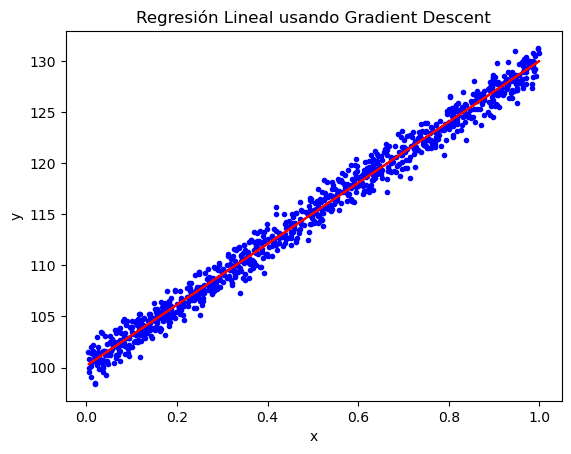

In [124]:
# Generar datos sintéticos
np.random.seed(42)
X = 1 * np.random.rand(1000, 1)
y = 100 + 30 * X + np.random.randn(1000, 1)

# Añadir el término de bias
X_b = np.c_[np.ones((1000, 1)), X]  # Añadir una columna de unos a X

# Definir la función de costo (error cuadrático medio)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Inicializar los parámetros theta
theta = np.random.randn(2, 1)

# Parámetros de gradient descent
learning_rate = 0.01
n_iterations = 10000



def gradient_descent(X, y, theta,learning_rate = 0.01,n_iterations = 30):
    print("hello world")
    cost_history = []
    m = len(y)
    for n in range(n_iterations):
        cost = compute_cost(theta,X,y)
        cost_history.append(cost)
        
        predictions = X.dot(theta)
        diff = predictions-y
        #print("diff ",diff,diff.shape)
        #print("X",X[:,1],X[:,1].shape)
        dtheta = (2/m)*X.T.dot(diff)
        #db = 2*np.mean(diff)
        #theta = theta[0]-learning_rate*db
        theta = theta - learning_rate*dtheta
        
    return theta, cost_history
 
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

    
    
    
# Para verificar los resultados
print("Theta encontrado:", theta)

# Visualizar los resultados 
plt.plot(X, y, 'b.')
plt.plot(X, X_b.dot(theta), 'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal usando Gradient Descent")
plt.show()

In [116]:
A = np.array([1,2,3,4])
B = np.array([4,3,2,1])

print(A.dot(B))

20
